# Моделирование между виртуальными агентами

## Описание задачи:

Для закрепления пройденного материала предлагаем вам следующее задание: используя библиотеку kaggle-environments, которая реализует функционал взаимодействия между виртуальными агентами в рамках нескольких популярных игр, реализовать самостоятельно несколько агентов и сравнить их в игре «камень-ножницы-бумага»

- Описать поведение бота, который будет играть с такими же ботами в игру «камень-ножницы-бумага». Поведение бота описывается с помощью функции, которая принимает на вход информацию о прошлых играх. Сигнатура функции приведена в Google Colab, а детальное описание входящих значений доступно по ссылке.

- После описания поведения агентов запустить турнир между ними и проверить, какая стратегия показывает себя лучше всех.


In [30]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from kaggle_environments import evaluate, make, utils

##  I Создание агентов

In [3]:
# Агент 1: Rock Agent
def rock_agent(observation, configuration):
    """
    Агент, который всегда играет "Камень" (0).
    """
    return 0  # Всегда играет "Камень"

# Агент 2: Paper Agent
def paper_agent(observation, configuration):
    """
    Агент, который всегда играет "Бумагу" (1).
    """
    return 1  # Всегда играет "Бумага"

# Агент 3: Scissors Agent
def scissors_agent(observation, configuration):
    """
    Агент, который всегда играет "Ножницы" (2).
    """
    return 2  # Всегда играет "Ножницы"

# Агент 4: Random Agent
def random_agent(observation, configuration):
    """
    Агент, который выбирает ход случайным образом.
    """
    return random.randint(0, 2)  # Случайный выбор между 0, 1 и 2

# Агент 5: Cycle Agent
def cycle_agent(observation, configuration):
    """
    Агент, который циклически переключается между "Камень", "Бумага" и "Ножницы".
    """
    return observation.step % 3  # Цикл по остатку от деления номера шага на 3

# Агент 6: Mirror Agent
def mirror_agent(observation, configuration):
    """
    Агент, который копирует предыдущий ход оппонента.
    На первом шаге делает случайный ход.
    """
    if observation.step == 0:
        return random.randint(0, 2)  # Случайный ход на первом шаге
    else:
        return observation.lastOpponentAction  # Копирует предыдущий ход оппонента

# Агент 7: Anti-Mirror Agent
def anti_mirror_agent(observation, configuration):
    """
    Агент, который играет ход, побеждающий предыдущий ход оппонента.
    На первом шаге делает случайный ход.
    """
    if observation.step == 0:
        return random.randint(0, 2)  # Случайный ход на первом шаге
    else:
        return (observation.lastOpponentAction + 1) % 3  # Ход, который побеждает предыдущий ход оппонента

# Агент 8: Statistical Agent
def statistical_agent(observation, configuration):
    """
    Агент, который отслеживает историю ходов оппонента и играет ход, побеждающий самый частый ход оппонента.
    """
    if observation.step == 0:
        statistical_agent.opponent_history = []  # Инициализация истории
        return random.randint(0, 2)  # Случайный ход на первом шаге
    else:
        statistical_agent.opponent_history.append(observation.lastOpponentAction)  # Обновляем историю
        # Находим самый частый ход оппонента
        most_common = max(set(statistical_agent.opponent_history), key = statistical_agent.opponent_history.count)
        # Играем ход, побеждающий самый частый ход оппонента
        return (most_common + 1) % 3

# Агент 9: Predictor Agent
def predictor_agent(observation, configuration):
    """
    Агент, который пытается предсказать следующий ход оппонента на основе предыдущих ходов.
    Использует простое правило: оппонент повторит свой предыдущий ход.
    """
    if observation.step == 0:
        predictor_agent.my_history = []
        predictor_agent.opponent_history = []
        predictor_agent.last_move = random.randint(0, 2)  # Случайный ход на первом шаге
        return predictor_agent.last_move
    else:
        predictor_agent.opponent_history.append(observation.lastOpponentAction)
        predictor_agent.my_history.append(predictor_agent.last_move)
        # Предполагаем, что оппонент повторит свой последний ход
        predicted_move = predictor_agent.opponent_history[-1]
        # Играем ход, побеждающий предположительный ход оппонента
        move = (predicted_move + 1) % 3
        predictor_agent.last_move = move
        return move

# Агент 10: Weighted Random Agent
def weighted_random_agent(observation, configuration):
    """
    Агент, который выбирает ходы случайно, но с заданными весами (вероятностями).
    В данном случае, предпочитает "Камень".
    """
    weights = [0.5, 0.3, 0.2]  # Вес для "Камня", "Бумаги" и "Ножниц" соответственно
    return random.choices([0,1,2], weights=weights)[0]
    
# Агент 11: Anti-Statistical Agent
def anti_statistical_agent(observation, configuration):
    """
    Агент, который играет ход, который проигрывает самому частому ходу оппонента.
    """

    if observation.step == 0:
        anti_statistical_agent.opponent_history = []  # Инициализация истории
        return random.randint(0, 2)  # Случайный ход на первом шаге
    else:
        anti_statistical_agent.opponent_history.append(observation.lastOpponentAction)  # Обновляем историю
        # Находим самый частый ход оппонента
        most_common = max(set(anti_statistical_agent.opponent_history), key = anti_statistical_agent.opponent_history.count)
        # Играем ход, который проигрывает самому частому ходу оппонента
        return (most_common + 2) % 3

# Агент 12: ML Agent (Простой пример на основе весов)
def ml_agent(observation, configuration):
    """
    Агент, который обучается на основе предыдущих ходов, обновляя веса для ходов, которые приносят победу.
    """
    if observation.step == 0:
        ml_agent.weights = [1, 1, 1]  # Инициализация весов для каждого хода
        ml_agent.last_action = random.randint(0, 2)
        return ml_agent.last_action
    else:
        # Обновляем веса на основе результата предыдущего раунда
        last_opponent_action = observation.lastOpponentAction
        result = (ml_agent.last_action - last_opponent_action) % 3
        if result == 1:  # Победа в предыдущем раунде
            ml_agent.weights[ml_agent.last_action] += 1  # Увеличиваем вес нашего последнего хода
        elif result == 2:  # Поражение в предыдущем раунде
            ml_agent.weights[ml_agent.last_action] -= 1  # Уменьшаем вес нашего последнего хода
            ml_agent.weights[last_opponent_action] += 1  # Увеличиваем вес хода оппонента
        # Нормализуем веса
        total = sum(ml_agent.weights)
        probs = [w / total for w in ml_agent.weights]
        # Выбираем ход на основе обновленных весов
        ml_agent.last_action = random.choices([0,1,2], weights=probs)[0]
        return ml_agent.last_action

# Агент 13: Frequency Adaptive Agent
def frequency_adaptive_agent(observation, configuration):
    """
    Агент, который адаптируется к частоте ходов оппонента, повышая вероятность ходов, побеждающих часто встречающиеся ходы оппонента.
    """
    if observation.step == 0:
        frequency_adaptive_agent.opponent_history = []  # Инициализация истории
        return random.randint(0, 2)  # Случайный ход на первом шаге
    else:
        frequency_adaptive_agent.opponent_history.append(observation.lastOpponentAction)  # Обновляем историю
        counts = [frequency_adaptive_agent.opponent_history.count(i) for i in range(3)]  # Количество каждого хода оппонента
        # Расчет вероятностей для ходов, побеждающих наиболее частые ходы оппонента
        probs = [counts[(i+1)%3] for i in range(3)]
        total = sum(probs)
        if total == 0:
            return random.randint(0, 2)  # Если статистики нет, делаем случайный ход
        probs = [p / total for p in probs]
        return random.choices([0,1,2], weights=probs)[0]

# Агент 14: Ваш Rock Agent (чтобы отличать от предыдущего)
def your_rock_agent(observation, configuration):
    """
    Ваш агент, который всегда играет "Камень" (0).
    """
    return 0  # Всегда играет "Камень"

# Агент 15: Copy Opponent Agent
def copy_opponent_agent(observation, configuration):
    """
    Ваш агент, который копирует предыдущий ход оппонента.
    На первом шаге делает случайный ход.
    """
    if observation.step == 0:
        return random.randint(0, 2)  # Случайный ход на первом шаге
    else:
        return observation.lastOpponentAction  # Копирует предыдущий ход оппонента

## II Проведение матча

In [4]:
# Список агентов
agents = [
    ('Rock Agent', rock_agent),
    ('Paper Agent', paper_agent),
    ('Scissors Agent', scissors_agent),
    ('Random Agent', random_agent),
    ('Cycle Agent', cycle_agent),
    ('Mirror Agent', mirror_agent),
    ('Anti-Mirror Agent', anti_mirror_agent),
    ('Statistical Agent', statistical_agent),
    ('Predictor Agent', predictor_agent),
    ('Weighted Random Agent', weighted_random_agent),
    ('Anti-Statistical Agent', anti_statistical_agent),
    ('ML Agent', ml_agent),
    ('Frequency Adaptive Agent', frequency_adaptive_agent),
    ('Your Rock Agent', your_rock_agent),
    ('Copy Opponent Agent', copy_opponent_agent)
]

# Функция для проведения матча между двумя агентами
def play_match(agent1, agent2, n_rounds=1000):
    """
    Проводит матч между двумя агентами и возвращает итоговый счет первого агента.

    Parameters:
    agent1 (function): Функция первого агента.
    agent2 (function): Функция второго агента.
    n_rounds (int): Количество раундов в матче.

    Returns:
    float: Итоговый счет первого агента.
    """
    # Создаем окружение игры
    env = make("rps", configuration={"episodeSteps": n_rounds}, debug=True)
    # Запускаем игру между агентами
    outcome = env.run([agent1, agent2])
    # Получаем итоговую награду первого агента
    reward = outcome[-1][0]["reward"]
    return reward

# Создаем DataFrame для хранения результатов
results = pd.DataFrame(index=[name for name, _ in agents], columns=[name for name, _ in agents])

# Проводим турниры между всеми агентами
for i, (name1, agent1) in enumerate(agents):
    for j, (name2, agent2) in enumerate(agents):
        print(f'Сыгрываем матч: {name1} vs {name2}')
        if i == j:
            results.loc[name1, name2] = 0  # Ничья с самим собой
        else:
            score = play_match(agent1, agent2)
            results.loc[name1, name2] = score

# Отображение результатов в виде таблицы
results_display = results.copy()
display(results_display)

Сыгрываем матч: Rock Agent vs Rock Agent
Сыгрываем матч: Rock Agent vs Paper Agent
Сыгрываем матч: Rock Agent vs Scissors Agent
Сыгрываем матч: Rock Agent vs Random Agent
Сыгрываем матч: Rock Agent vs Cycle Agent
Сыгрываем матч: Rock Agent vs Mirror Agent
Сыгрываем матч: Rock Agent vs Anti-Mirror Agent
Сыгрываем матч: Rock Agent vs Statistical Agent
Сыгрываем матч: Rock Agent vs Predictor Agent
Сыгрываем матч: Rock Agent vs Weighted Random Agent
Сыгрываем матч: Rock Agent vs Anti-Statistical Agent
Сыгрываем матч: Rock Agent vs ML Agent
Сыгрываем матч: Rock Agent vs Frequency Adaptive Agent
Сыгрываем матч: Rock Agent vs Your Rock Agent
Сыгрываем матч: Rock Agent vs Copy Opponent Agent
Сыгрываем матч: Paper Agent vs Rock Agent
Сыгрываем матч: Paper Agent vs Paper Agent
Сыгрываем матч: Paper Agent vs Scissors Agent
Сыгрываем матч: Paper Agent vs Random Agent
Сыгрываем матч: Paper Agent vs Cycle Agent
Сыгрываем матч: Paper Agent vs Mirror Agent
Сыгрываем матч: Paper Agent vs Anti-Mirror Ag

,Rock Agent,Paper Agent,Scissors Agent,Random Agent,Cycle Agent,Mirror Agent,Anti-Mirror Agent,Statistical Agent,Predictor Agent,Weighted Random Agent,Anti-Statistical Agent,ML Agent,Frequency Adaptive Agent,Your Rock Agent,Copy Opponent Agent
Rock Agent,0,-999.0,999.0,23.0,0,0,-997.0,-998.0,-997.0,-67.0,999.0,-986.0,997.0,0,0
Paper Agent,999.0,0,-999.0,-20.0,0,0,-997.0,-999.0,-999.0,256.0,999.0,-983.0,999.0,999.0,0
Scissors Agent,-999.0,999.0,0,30.0,0,0,-998.0,-997.0,-999.0,-231.0,997.0,-988.0,999.0,-999.0,0
Random Agent,0,-22.0,24.0,0,0,-27.0,49.0,0,-28.0,0,-31.0,72.0,0,0,43.0
Cycle Agent,0,0,0,0,0,999.0,0,0,0,38.0,0,0,30.0,0,998.0
Mirror Agent,0,0,0,-40.0,-998.0,0,-500.0,-198.0,-500.0,30.0,248.0,0,20.0,0,0
Anti-Mirror Agent,998.0,998.0,997.0,0,0,500.0,0,499.0,0,68.0,999.0,0,855.0,999.0,500.0
Statistical Agent,998.0,997.0,997.0,-28.0,0,-999.0,-499.0,0,-499.0,308.0,999.0,0,986.0,998.0,200.0
Predictor Agent,998.0,997.0,999.0,0,0,500.0,0,499.0,0,51.0,999.0,35.0,253.0,998.0,500.0
Weighted Random Agent,123.0,-247.0,204.0,-25.0,0,0,-94.0,-297.0,-83.0,0,168.0,-125.0,53.0,70.0,0


In [6]:
# Расчет среднего счета каждого агента
average_scores = results.astype(float).mean(axis=1).sort_values(ascending=False)
print("Средний счет каждого агента:")
display(average_scores)

Средний счет каждого агента:


Anti-Mirror Agent           494.200000
Predictor Agent             455.266667
ML Agent                    360.666667
Statistical Agent           297.200000
Cycle Agent                 137.666667
Copy Opponent Agent          68.200000
Random Agent                  5.333333
Weighted Random Agent       -16.866667
Paper Agent                 -49.666667
Mirror Agent               -129.200000
Rock Agent                 -135.066667
Your Rock Agent            -139.800000
Scissors Agent             -212.400000
Frequency Adaptive Agent   -389.000000
Anti-Statistical Agent     -480.066667
dtype: float64

In [7]:
# Отображение топ-3 агентов по среднему счету
top_agents = average_scores.head(3)
print("Топ-3 лучших агента по среднему счету:")
display(top_agents)

Топ-3 лучших агента по среднему счету:


Anti-Mirror Agent    494.200000
Predictor Agent      455.266667
ML Agent             360.666667
dtype: float64

In [8]:
# evaluate из kaggle_environments
# Матч между вашим агентом "Камень" и агентом, копирующим оппонента
scores = evaluate(
    "rps",  # Окружение - Камень-Ножницы-Бумага
    [your_rock_agent, copy_opponent_agent],  # Агенты для игры
    configuration={"episodeSteps": 100}  # Количество раундов
)
print(f"Результат матча Your Rock Agent vs Copy Opponent Agent: {scores}")

# Матч между вашим агентом "Камень" и "Paper Agent"
scores = evaluate(
    "rps",  # Окружение - Камень-Ножницы-Бумага
    [your_rock_agent, paper_agent],  # Агенты для игры
    configuration={"episodeSteps": 100}  # Количество раундов
)
print(f"Результат матча Your Rock Agent vs Paper Agent: {scores}")

Результат матча Your Rock Agent vs Copy Opponent Agent: [[0, 0]]
Результат матча Your Rock Agent vs Paper Agent: [[-99.0, 99.0]]


## III Анализ результатов

In [20]:
# Преобразуем результаты в числовой формат
results_numeric = results.astype(float)


In [21]:
# Вычисляем общий счет
total_scores = results_numeric.sum(axis=1)
# Отображаем общий счет
print("Общий счет каждого агента:")
display(total_scores.sort_values(ascending=False))

Общий счет каждого агента:


Anti-Mirror Agent           7413.0
Predictor Agent             6829.0
ML Agent                    5410.0
Statistical Agent           4458.0
Cycle Agent                 2065.0
Copy Opponent Agent         1023.0
Random Agent                  80.0
Weighted Random Agent       -253.0
Paper Agent                 -745.0
Mirror Agent               -1938.0
Rock Agent                 -2026.0
Your Rock Agent            -2097.0
Scissors Agent             -3186.0
Frequency Adaptive Agent   -5835.0
Anti-Statistical Agent     -7201.0
dtype: float64

In [22]:
# Рейтинг на основе общего счета
rankings = total_scores.sort_values(ascending=False)

# Отображаем рейтинг
print("Рейтинг агентов:")
for i, (agent, score) in enumerate(rankings.items(), 1):
    print(f"{i}. {agent}: {score}")

Рейтинг агентов:
1. Anti-Mirror Agent: 7413.0
2. Predictor Agent: 6829.0
3. ML Agent: 5410.0
4. Statistical Agent: 4458.0
5. Cycle Agent: 2065.0
6. Copy Opponent Agent: 1023.0
7. Random Agent: 80.0
8. Weighted Random Agent: -253.0
9. Paper Agent: -745.0
10. Mirror Agent: -1938.0
11. Rock Agent: -2026.0
12. Your Rock Agent: -2097.0
13. Scissors Agent: -3186.0
14. Frequency Adaptive Agent: -5835.0
15. Anti-Statistical Agent: -7201.0


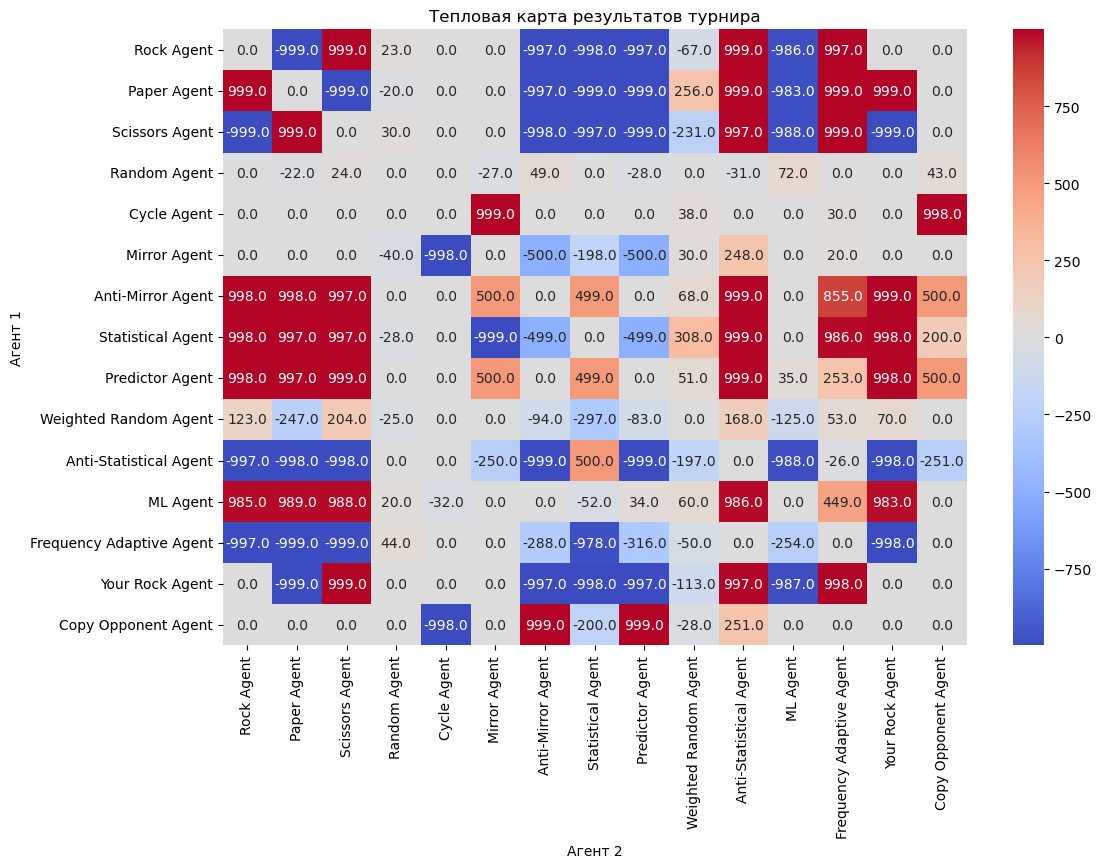

In [23]:
# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(results_numeric, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Тепловая карта результатов турнира")
plt.ylabel("Агент 1")
plt.xlabel("Агент 2")
plt.show()

### Анализ коэффициентов побед

Поскольку игра "Камень, ножницы, бумага" имеет нулевую сумму, можно вычислить процент побед для каждого агента.

In [24]:
# Подсчет побед (положительный счет)
wins = (results_numeric > 0).sum(axis=1)

# Подсчет поражений (отрицательный счет)
losses = (results_numeric < 0).sum(axis=1)

# Подсчет ничьих (нулевой счет)
draws = (results_numeric == 0).sum(axis=1)

# Общее количество матчей (исключая матчи с самим собой)
total_matches = len(agents) - 1

# Вычисляем процент побед
win_rates = (wins / total_matches) * 100

# Создаем DataFrame с результатами
performance_df = pd.DataFrame({
    'Победы': wins,
    'Поражения': losses,
    'Ничьи': draws,
    'Процент побед': win_rates
})

# Сортируем по проценту побед
performance_df = performance_df.sort_values(by='Процент побед', ascending=False)

# Отображаем результаты
print("Анализ производительности агентов:")
display(performance_df)

Анализ производительности агентов:


,Победы,Поражения,Ничьи,Процент побед
Predictor Agent,11,0,4,78.571429
Anti-Mirror Agent,10,0,5,71.428571
ML Agent,9,2,4,64.285714
Statistical Agent,8,4,3,57.142857
Paper Agent,5,6,4,35.714286
Weighted Random Agent,5,6,4,35.714286
Rock Agent,4,6,5,28.571429
Scissors Agent,4,7,4,28.571429
Random Agent,4,4,7,28.571429
Cycle Agent,4,0,11,28.571429


### Анализ производительности агентов

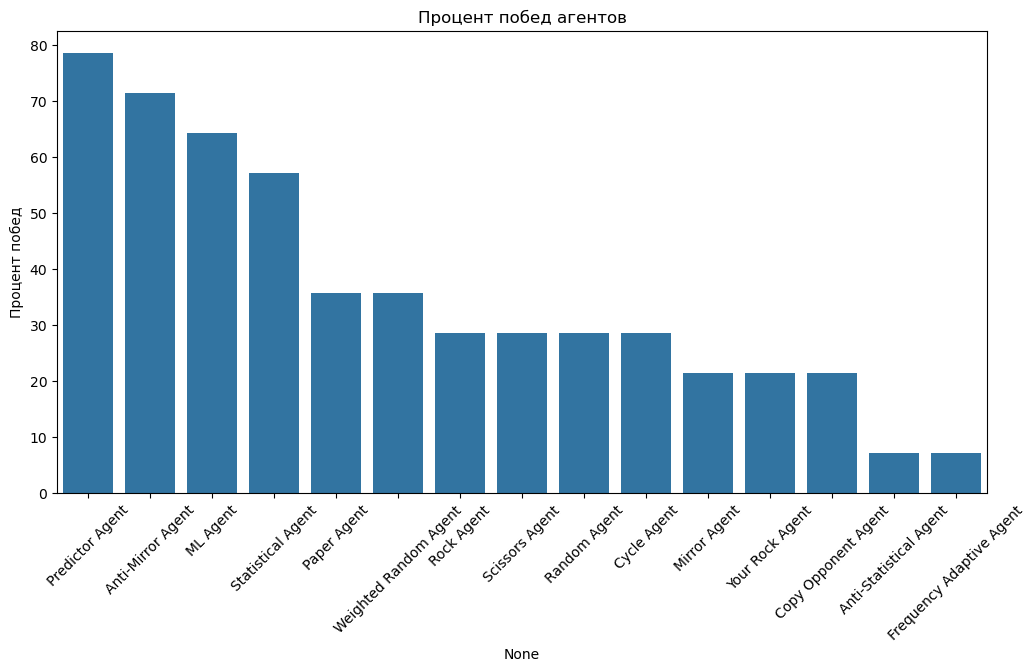

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_df.index, y='Процент побед', data=performance_df)
plt.xticks(rotation=45)
plt.ylabel("Процент побед")
plt.title("Процент побед агентов")
plt.show()

### Обзор производительности агентов:

***1. Лидеры турнира:***
   - ***Predictor Agent*** занял первое место с ***11*** победами, ***0*** поражениями и ***4*** ничьими, достигнув ***78.57%*** побед.
   - ***Anti-Mirror Agent*** на втором месте с ***10*** победами, ***0*** поражениями и ***5*** ничьими, имея ***71.43%*** побед.
   - ***ML Agent** занял третье место с ***9*** победами, ***2*** поражениями и ***4*** ничьими, с процентом побед ***64.29%***.

***2. Средние результаты:***
   - ***Statistical Agent*** показал умеренные результаты с ***8*** победами и ***57.14%*** побед.
   - ***Paper Agent*** и ***Weighted Random Agent*** имеют одинаковые показатели: ***5*** побед, ***6*** поражений, ***4*** ничьих и ***35.71%*** побед.
   - Агенты с постоянными стратегиями, такие как ***Rock Agent*** и ***Scissors Agent***, имеют около ***28.57%*** побед, что указывает на их ограниченную эффективность.

***3. Агенты с низкой эффективностью:***
   - ***Frequency Adaptive Agent*** и ***Anti-Statistical Agent*** показали наихудшие результаты, оба имеют лишь ***1*** победу и процент побед ***7.14%***.
   - ***Mirror Agent***, ***Your Rock Agent*** и ***Copy Opponent Agent*** имеют около ***21.43%*** побед, что также свидетельствует о низкой эффективности их стратегий.

**Матрица корреляции**

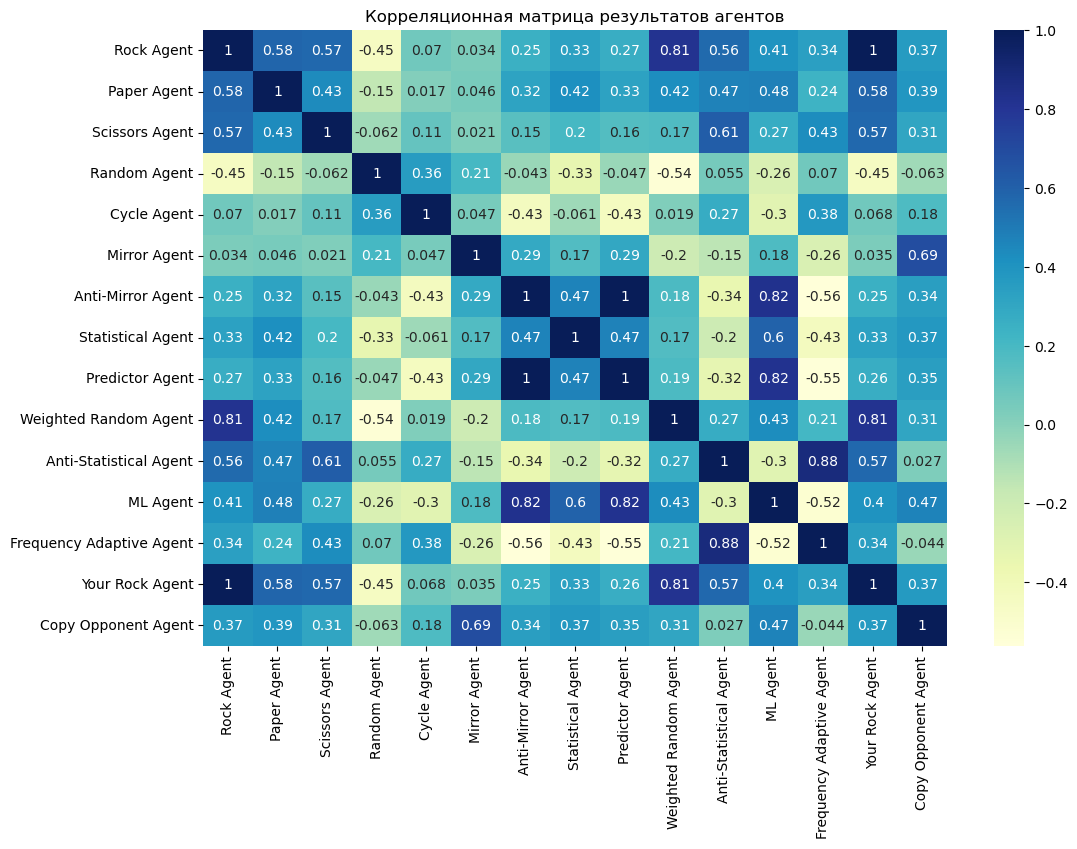

In [26]:
correlation_matrix = results_numeric.corr()

# Отображаем корреляционную матрицу
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Корреляционная матрица результатов агентов")
plt.show()

In [27]:
correlation_matrix

,Rock Agent,Paper Agent,Scissors Agent,Random Agent,Cycle Agent,Mirror Agent,Anti-Mirror Agent,Statistical Agent,Predictor Agent,Weighted Random Agent,Anti-Statistical Agent,ML Agent,Frequency Adaptive Agent,Your Rock Agent,Copy Opponent Agent
Rock Agent,1.000000,0.581461,0.567542,-0.450896,0.069852,0.033800,0.254250,0.330242,0.266741,0.812069,0.563885,0.406191,0.338596,0.999830,0.365026
Paper Agent,0.581461,1.000000,0.434986,-0.154141,0.016586,0.045600,0.317565,0.416109,0.328080,0.421670,0.472016,0.477259,0.236208,0.583204,0.390109
Scissors Agent,0.567542,0.434986,1.000000,-0.061913,0.106534,0.020984,0.146332,0.203757,0.159171,0.174992,0.614903,0.269186,0.427194,0.567545,0.307000
Random Agent,-0.450896,-0.154141,-0.061913,1.000000,0.358627,0.206440,-0.042912,-0.330413,-0.047404,-0.540501,0.054717,-0.261756,0.070411,-0.445325,-0.062606
Cycle Agent,0.069852,0.016586,0.106534,0.358627,1.000000,0.046927,-0.429247,-0.060534,-0.433769,0.018543,0.272290,-0.302561,0.375853,0.067751,0.177489
Mirror Agent,0.033800,0.045600,0.020984,0.206440,0.046927,1.000000,0.291937,0.168119,0.294195,-0.196810,-0.146289,0.182174,-0.257308,0.034568,0.687450
Anti-Mirror Agent,0.254250,0.317565,0.146332,-0.042912,-0.429247,0.291937,1.000000,0.469155,0.999175,0.184920,-0.342049,0.824230,-0.560940,0.251858,0.343425
Statistical Agent,0.330242,0.416109,0.203757,-0.330413,-0.060534,0.168119,0.469155,1.000000,0.472021,0.169511,-0.199209,0.595071,-0.431729,0.330262,0.373417
Predictor Agent,0.266741,0.328080,0.159171,-0.047404,-0.433769,0.294195,0.999175,0.472021,1.000000,0.188602,-0.324455,0.821505,-0.551621,0.264194,0.346349
Weighted Random Agent,0.812069,0.421670,0.174992,-0.540501,0.018543,-0.196810,0.184920,0.169511,0.188602,1.000000,0.274073,0.429284,0.213371,0.812127,0.310743


## Выводы

Анализ предоставленной корреляционной матрицы результатов агентов в турнире "Камень, ножницы, бумага" позволяет сделать следующие выводы:

***1. Высокая корреляция между агентами со схожими стратегиями:***
   - ***Rock Agent*** и ***Your Rock Agent*** имеют почти полную корреляцию ***(0.999830)***, что указывает на то, что эти агенты используют идентичные стратегии, всегда выбирая "Камень".
   - ***Anti-Mirror Agent*** и ***Predictor Agent*** демонстрируют очень высокую корреляцию ***(0.999175)***, что свидетельствует о схожести их подходов к предсказанию и противодействию ходам оппонента.
   - ***Frequency Adaptive Agent*** и ***Anti-Statistical*** Agent обладают высокой положительной корреляцией ***(0.882438)***, предполагая, что обе стратегии основаны на анализе частоты ходов оппонента и адаптации к ним.

***2. Негативная корреляция между контрстратегиями:***
   - ***Anti-Mirror Agent*** и ***Cycle Agent*** имеют заметно отрицательную корреляцию ***(-0.429247)***, что может указывать на эффективность одной стратегии против другой. Возможно, циклтический агент уязвим перед агентом, который действует противоположно предыдущим ходам оппонента.
   - ***Frequency Adaptive Agent*** и ***ML Agent*** демонстрируют отрицательную корреляцию ***(-0.521831)***, что может свидетельствовать о том, что обучающаяся модель эффективно противостоит агенту, адаптирующемуся к частотам ходов.

***3. Группы агентов с похожим поведением:***
   - Предсказывающие агенты: ***Statistical Agent***, ***Predictor Agent***, ***ML Agent*** и ***Anti-Mirror Agent*** имеют высокую взаимную корреляцию, указывая на то, что их стратегии основаны на предсказании будущих ходов оппонента.
   - Агенты, копирующие оппонента: ***Mirror Agent*** и ***Copy Opponent Agent*** имеют высокую корреляцию ***(0.687450)***, что логично, поскольку оба агента полагаются на предыдущие ходы противника для определения своей следующей стратегии.

***4. Влияние рандомности:***
   - ***Random Agent*** имеет низкую или отрицательную корреляцию с большинством других агентов. Это указывает на то, что рандомная стратегия создает сложности для агентов, пытающихся предсказать или адаптироваться к ходам оппонента.
   - Отрицательная корреляция между Random Agent и агентами с постоянными или предсказуемыми стратегиями, такими как ***Rock Agent***, подтверждает трудности адаптации к полностью случайным ходам.

***5. Особенности отдельных агентов:***
   - ***Weighted Random Agent*** имеет высокую корреляцию с ***Rock Agent (0.812069)*** и ***Your Rock Agent (0.812127)***, что может указывать на смещение вероятностей в пользу выбора "Камень" в его стратегии.
   - ***Anti-Statistical Agent*** демонстрирует высокую положительную корреляцию с ***Anti-Mirror Agent*** (***-0.342049*** отрицательная, но в контексте матрицы она высокая по абсолютной величине), что может указывать на их общее противодействие статистическим и зеркальным стратегиям оппонентов.

***6. Эффективность предсказательных моделей:***
   - Высокая корреляция между ***ML Agent, Predictor Agent*** и ***Statistical Agent*** свидетельствует о том, что машинное обучение и статистические методы эффективны в предсказании ходов оппонентов и приносят схожие результаты.

***7. Значимость адаптивных стратегий:***
   - ***Frequency Adaptive Agent*** показывает высокую корреляцию с ***Anti-Statistical Agent***, что подтверждает эффективность адаптации к частотам ходов противника.
   - Отрицательная корреляция между Frequency Adaptive Agent и предсказывающими агентами может указывать на их уязвимость перед стратегиями, основанными на прогнозировании.


### Заключение

- Схожие стратегии приводят к схожим результатам: агенты, использующие идентичные или похожие стратегии, имеют высокую положительную корреляцию, что ожидаемо и подтверждает эффективность или неэффективность этих стратегий в одних и тех же ситуациях.
  
- Предсказательные и адаптивные стратегии эффективны: высокая взаимная корреляция между агентами, использующими предсказательные модели и адаптирующимися к ходам оппонента, свидетельствует о том, что такие стратегии могут быть успешными против различных типов оппонентов.
  
- Рандомность создает сложности для предсказания: низкая или отрицательная корреляция ***Random Agent*** с другими агентами указывает на то, что полностью случайные стратегии затрудняют предсказание и адаптацию, что может быть использовано для противодействия стратегическим игрокам.
  
- Уязвимость определенных стратегий: агенты с постоянными или предсказуемыми ходами (например, всегда выбирающие "Камень") могут быть легко побеждены адаптивными или предсказывающими агентами, что отражается в соответствующих корреляциях.